In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pyomo
from pyomo.environ import *
from pyomo.environ import SolverFactory

## Python Exercises

### Question 1

Suppose we have two lists, x and y that give the x and y coordinates
of a set of points. Create a list with the coordinates (x,y) as a tuple.
Hint: Find out about the zip function.


In [2]:
x = [1 , 2 , 3]
y = [3 , 2 , 1]


coordinates = zip(x , y)

In [3]:
### check zip
list(coordinates)

[(1, 3), (2, 2), (3, 1)]

### Question 2

Suppose we have two vectors, x and y, stored as tuples with n elements.
Implement functions that compute the l1 and l2 distances between x
and y. Note that n is not explicitly given.

In [4]:
def calculate_distance(x , y):
    distance = 0
    for i in range(len(x)):
        distance = distance + (abs(x[i] - y[i])**2)
    
    return math.sqrt(distance)

### Test

In [5]:
calculate_distance([1, 2] , [2, 3])

1.4142135623730951

### Question 3

Plot the function $e^{−x}x^2$ over the range [0, 10] using matplotlib

In [6]:
def func_2_plot(x):
    return math.exp(x * -1) * (x ** 2)

In [87]:
num_2_plot = np.arange(0 , 11 , 0.01)
y = [func_2_plot(x) for x in num_2_plot]

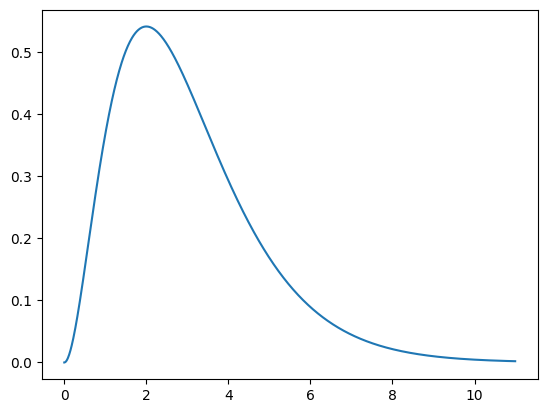

In [88]:
plt.plot(num_2_plot , y)

### Question 4

Find the sqrt of a number using n without using the sqrt function.
Hint: Use binary search for this

In [9]:
def find_sqrt(x):
    full_map = np.arange(0 , x , 0.01)
    
    upper_bound = len(full_map) - 1
    lower_bound = 0
    
    current_index = len(full_map) - 1
    
    ### while loop breaker
    if_continue = True
    
    ### implement binary search
    while if_continue:
        ### index for binary search
        current_index = int(lower_bound + (upper_bound - lower_bound) / 2)
    
        ### if number is within certain range of difference to the number we want
        if abs(full_map[current_index] ** 2 - x) < 0.02:
            if_continue = False
            break
        
        ### if number^2 is greater than the number we want, then reset higher bound
        elif full_map[current_index] ** 2 > x:
            upper_bound = current_index
            continue
        ### if number^2 is lower than the number we want, then reset lower bound
        else:
            lower_bound = current_index
            continue
        
    return full_map[current_index]

### Examine function for question 4

In [10]:
def test_sqrt_function(x):
    number_to_test = x
    
    print(f"Answer from my function : {find_sqrt(x)}")
    print(f"Answer from math.sqrt function : {round(math.sqrt(x) , 2)}")

In [11]:
test_sqrt_function(5)

Answer from my function : 2.24
Answer from math.sqrt function : 2.24


In [12]:
test_sqrt_function(10)

Answer from my function : 3.16
Answer from math.sqrt function : 3.16


In [13]:
test_sqrt_function(100)

Answer from my function : 10.0
Answer from math.sqrt function : 10.0


## Knapsack Problem

Consider a thief who goes into a warehouse with a knapsack. There is a
limit to how much weight the knapsack can carry. The warehouse has many
items, each of which is divisible into arbitrarily small fragments eg. gold,
silver, diamond dust, etc. The thief wants to fill her knapsack with the most
profitable bundle of goods. How can she decide what this bundle is?
The first stage in solving an optimization problem is modeling. And the
very first as well as the most important step in modeling is to name your
quantities. Let the knapsack capacity be W lbs. Let N denote the number
of goods in the warehouse. Let the total weight of the ith good be wi and let
the value of the ith good be vi.
The next step is to decide what quantities we are free to choose. These are
known as decision variables. In this case, the thief must decide how much of
each item to carry. Let xi denote the fraction of the ith good carried away
by the thief The next two steps in modeling an optimization problem are to decide what
our goals and restrictions are. The goal is commonly referred to as an ob-
jective function which we need to either maximize or minimize depending on
the problem. In this case, the objective function is P
i vixi, which is the total
profit made by the thief, and we need to maximize the objective function.
The restrictions are that 

(a) the thief can not take more of a good than is
available in the warehouse, and

(b) the thief can not carry more weight than
the knapsack capacity.

### 1. Model the above problem as a LP

Target function:

$\sum_{i = 1}^{N}$$x_i$$v_i$



Constraints:

1. ∀i ∈{1,...,N}, xi ≤ 1

\
2. $\sum_{i = 1}^{N}$$x_i$$w_i$ $\le$ W

3. $w_i$ < quantity of good in warehouse i

### 2. Consider a specific instance of the problem with N = 3 and W = 4 Let v = (2,3,4) and w = (5,20,3) Use Pyomo to obtain the optimal solution


In [27]:
# create a model
model = ConcreteModel()

# declare decision variables
model.gold = Var(domain = NonNegativeReals)  #gold
model.silver = Var(domain = NonNegativeReals)  #silver
model.diamond = Var(domain = NonNegativeReals) #diamond

# declare objective
model.profit = Objective(expr = 2 * model.gold + 3 * model.silver + 4 * model.diamond , sense = maximize)

# declare constraints
model.Weight_constraint = Constraint(expr = 5 * model.gold + 20 * model.silver + 3 * model.diamond <= 4)
model.gold_constraint = Constraint(expr = model.gold <= 1)
model.silver_constraint = Constraint(expr = model.silver <= 1)
model.diamond_constraint = Constraint(expr = model.diamond <= 1)


model.pprint()

3 Var Declarations
    diamond : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    gold : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    silver : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals

1 Objective Declarations
    profit : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : 2*gold + 3*silver + 4*diamond

4 Constraint Declarations
    Weight_constraint : Size=1, Index=None, Active=True
        Key  : Lower : Body                           : Upper : Active
        None :  -Inf : 5*gold + 20*silver + 3*diamond :   4.0 :   True
    diamond_constraint : Size=1, Index=None, Active=True
        Key  : Lower

In [29]:
SolverFactory('glpk').solve(model).write()

# display solution
print('\nProfit = ', model.profit())

print('\nDecision Variables')
print('gold = ', model.gold())
print('silver = ', model.silver())
print('diamond = ', model.diamond())


print('\nConstraints')
print('Weight constraint = ', model.Weight_constraint())
print("Gold constraint = " , model.gold_constraint())
print("Silver constraint = " , model.silver_constraint())
print("Diamond constraint = " , model.diamond_constraint())



# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 4.4
  Upper bound: 4.4
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 4
  Number of nonzeros: 7
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.011645793914794922
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------

### 3. Which constrains are tight/binding ?

1. Wegith constraint
2. diamond quantity constraint

### 4. Suppose a crime syndicate wants to buy out the thief. They offer to pay the thief a price y1 for the gold, a price y2 for the diamonds, a price y3 for the silver, and a price y4 per lb for the knapsack. The syndicate wants to minimize the price it pays for the goods. What is the solution for this problem. What is the connection to the previous problem ? (The thief haven't stolen anything yet)

In [37]:
# create a model_syn
model_syn = ConcreteModel()

# declare decision variables
model_syn.y1 = Var(domain = NonNegativeReals)  #gold
model_syn.y2 = Var(domain = NonNegativeReals)  #silver
model_syn.y3 = Var(domain = NonNegativeReals) #diamond
model_syn.y4 = Var(domain = NonNegativeReals) #knapsack

# declare objective
model_syn.cost = Objective(expr =  model_syn.y1 + model_syn.y2 + model_syn.y3 + 4 * model_syn.y4 , sense = minimize)

# declare constraints
model_syn.constraint1 = Constraint(expr = model_syn.y1 + 5 * model_syn.y4 >= 2)
model_syn.constraint2 = Constraint(expr = model_syn.y2 + 20 * model_syn.y4 >= 3)
model_syn.constraint3 = Constraint(expr = model_syn.y3 + 3 * model_syn.y4 >= 4)

model_syn.pprint()

4 Var Declarations
    y1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    y2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    y3 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    y4 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals

1 Objective Declarations
    cost : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : minimize : y1 + y2 + y3 + 4*y4

3 Constraint Declarations
    constraint1 : Size=1, Index=None, Active=True
        Key  : Lower : Body      : Upper : Active
        None :   2.0 : y1 + 5*y4 :  

In [38]:
SolverFactory('glpk').solve(model_syn).write()

# display solution
print('\nCost = ', model_syn.cost())

print('\nDecision Variables')
print('y1 = ', model_syn.y1())
print('y2 = ', model_syn.y2())
print('y3 = ', model_syn.y3())
print('y4 = ', model_syn.y4())



# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 4.4
  Upper bound: 4.4
  Number of objectives: 1
  Number of constraints: 4
  Number of variables: 5
  Number of nonzeros: 7
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.04004406929016113
# ----------------------------------------------------------
#   Solution Information
# -----------------------------------------

The connection between this question and the previous one is that, the solution approach equals to the dual problem form of the previous one.

### 5. Discussion Points

**(a) The above instance had a unique optimum solution. Will this be true for all instances of the knapsack problem?.**


I think it will not be true for all instances of the knapsack problem, there could be possibility that the optimum solution is not a corner point but an edge hence giving us infinite solutions.

**(b) What happens if we remove the constraint x ≥ 0 in the first part?**

In [40]:
# create a model
model = ConcreteModel()

# declare decision variables
model.gold = Var(domain = Reals)  #gold
model.silver = Var(domain = Reals)  #silver
model.diamond = Var(domain = Reals) #diamond

# declare objective
model.profit = Objective(expr = 2 * model.gold + 3 * model.silver + 4 * model.diamond , sense = maximize)

# declare constraints
model.Weight_constraint = Constraint(expr = 5 * model.gold + 20 * model.silver + 3 * model.diamond <= 4)
model.gold_constraint = Constraint(expr = model.gold <= 1)
model.silver_constraint = Constraint(expr = model.silver <= 1)
model.diamond_constraint = Constraint(expr = model.diamond <= 1)


model.pprint()

3 Var Declarations
    diamond : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :  None :  None : False :  True :  Reals
    gold : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :  None :  None : False :  True :  Reals
    silver : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :  None :  None : False :  True :  Reals

1 Objective Declarations
    profit : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : 2*gold + 3*silver + 4*diamond

4 Constraint Declarations
    Weight_constraint : Size=1, Index=None, Active=True
        Key  : Lower : Body                           : Upper : Active
        None :  -Inf : 5*gold + 20*silver + 3*diamond :   4.0 :   True
    diamond_constraint : Size=1, Index=None, Active=True
        Key  : Lower : Body    : Upper : Active
  

In [41]:
SolverFactory('glpk').solve(model).write()

# display solution
print('\nProfit = ', model.profit())

print('\nDecision Variables')
print('gold = ', model.gold())
print('silver = ', model.silver())
print('diamond = ', model.diamond())


print('\nConstraints')
print('Weight constraint = ', model.Weight_constraint())
print("Gold constraint = " , model.gold_constraint())
print("Silver constraint = " , model.silver_constraint())
print("Diamond constraint = " , model.diamond_constraint())

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 5.4
  Upper bound: 5.4
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 4
  Number of nonzeros: 7
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.010895967483520508
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------

\
\
We will yield negative portion of **Silver**!


\
\


**(c) Can you list some more feasible solutions to this LP?**

In [81]:
def create_feasible_solution(v1 , v2 , v3):
    model = ConcreteModel()

    # declare decision variables
    model.gold = Var(domain = NonNegativeReals)  #gold
    model.silver = Var(domain = NonNegativeReals)  #silver
    model.diamond = Var(domain = NonNegativeReals) #diamond

    # declare objective
    model.profit = Objective(expr = v1 * model.gold + v2 * model.silver + v3 * model.diamond , sense = maximize)

    # declare constraints
    model.Weight_constraint = Constraint(expr = 5 * model.gold + 20 * model.silver + 3 * model.diamond <= 4)
    model.gold_constraint = Constraint(expr = model.gold <= 1)
    model.silver_constraint = Constraint(expr = model.silver <= 1)
    model.diamond_constraint = Constraint(expr = model.diamond <= 1)

    SolverFactory('glpk').solve(model)

    print('\nConstraints')
    print('Weight constraint = ', model.Weight_constraint())
    print("Gold constraint = " , model.gold_constraint())
    print("Silver constraint = " , model.silver_constraint())
    print("Diamond constraint = " , model.diamond_constraint())

In [83]:
create_feasible_solution(1 , 5 , 3)


Constraints
Weight constraint =  4.0
Gold constraint =  0.0
Silver constraint =  0.05
Diamond constraint =  1.0


In [86]:
create_feasible_solution(5 , 5 , 1)


Constraints
Weight constraint =  4.0
Gold constraint =  0.8
Silver constraint =  0.0
Diamond constraint =  0.0


Yes! I can create more feasible solutions by adjusting the value of each item.

**(d) Can you think of more realistic applications for the knapsack problem?**

We can probably solve this problem by calculating the unit price of each item and steal upon the sequence of values, and each time we steal all of the underlying item. For example, if we only have gold and diamond to steal from, the unit price of gold is : 2 / 5, which is lower than that of diamond, which is 4 / 3, therefore, we start by stealing every bit of diamonds and fill the rest of the knapsack with gold to make sure that we maximize the profit.

**(e) Why might it be practically important that only one good is chosen fractionally?**

Becuase it can be hard for the thief to separate items into fractions, by minimizing number of items to separate, it makes it easier to implement the stealing plan.